# Librerías

In [2]:
import pandas as pd
from palette_creator import PaletteCreator, show_palette
from pathlib import Path
import cv2
import json

# Funciones auxiliares

In [3]:
import numpy as np

def load_img(path_img):
    path_img = str(path_img)

    # Check if path exists
    if not Path(path_img).exists():
        print(f"Path {path_img} doesn't exist")
        return None
    
    return cv2.cvtColor(cv2.imread(path_img), cv2.COLOR_BGR2RGB)

class NumpyEncoder(json.JSONEncoder):
    """ Special json encoder for numpy types """
    def default(self, obj):
        if isinstance(obj, (np.int_, np.intc, np.intp, np.int8,
                            np.int16, np.int32, np.int64, np.uint8,
                            np.uint16, np.uint32, np.uint64)):
            return int(obj)
        elif isinstance(obj, (np.float_, np.float16, np.float32,
                              np.float64)):
            return float(obj)
        elif isinstance(obj, (np.ndarray,)):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)

def save_results_to_db(db, method, results): 
    palettes, proportions = map(list, zip(*results)) # descomprimir una lista de 2-tuplas en 2 listas
    db[f"{method}_palette"], db[f"{method}_proportions"] = palettes, proportions
    db[f"{method}_palette"] = db[f"{method}_palette"].apply(lambda x: json.dumps(x, cls=NumpyEncoder))
    db[f"{method}_proportions"] = db[f"{method}_proportions"].apply(lambda x: json.dumps(x, cls=NumpyEncoder))

# Configuración

In [4]:
# establecer rutas
PATH_IMAGES_FOLDER = Path('data/beatriz_gonzalez')
PATH_IMAGES_METADATA = Path("beatriz_gonzalez.csv")

db = pd.read_csv(PATH_IMAGES_METADATA)
db["path_image"] = PATH_IMAGES_FOLDER/db["filename"]

# Preprocesamiento
Cargar imagenes y aplicarles filtros de ser necesario

In [9]:
%%time
images = [load_img(path_image) for path_image in db["path_image"]] # cargar imagenes en una lista

CPU times: user 44.2 s, sys: 26.5 s, total: 1min 10s
Wall time: 43.5 s


In [5]:
print(f'Total de imagenes: {len(images)}')

Total de imagenes: 1238


In [6]:
# aplicar filtros que homogenicen las imágenes

# Procesamiento Median Cut

In [7]:
pc = PaletteCreator(method="median_cut")

In [8]:
%%time
results = pc.create_palette(images) # crear paletas

100%|██████████| 1238/1238 [04:49<00:00,  4.28it/s]

CPU times: user 3min 14s, sys: 37.3 s, total: 3min 51s
Wall time: 4min 49s


## Guardar resultados

In [12]:
save_results_to_db(db, pc.method, results)
db.to_csv(PATH_IMAGES_METADATA, index=False)

: 

# Ejemplo de visualización

In [5]:
db = pd.read_csv(PATH_IMAGES_METADATA)

In [7]:
palette_img = db['median_cut_palette'].values
proportions_img = db['median_cut_proportions'].values

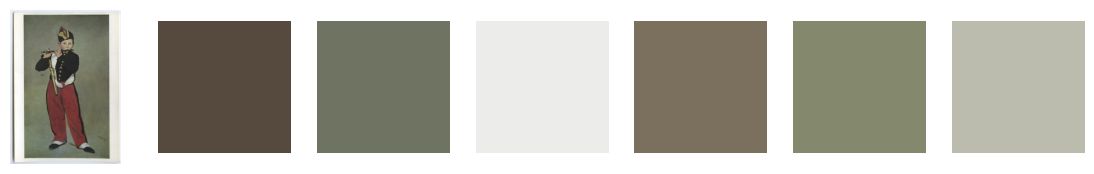

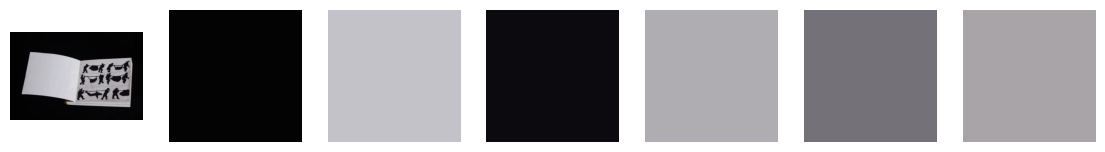

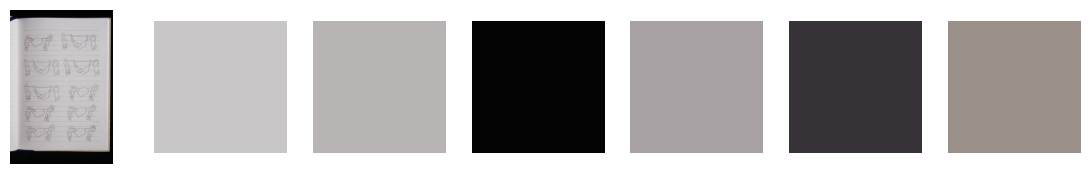

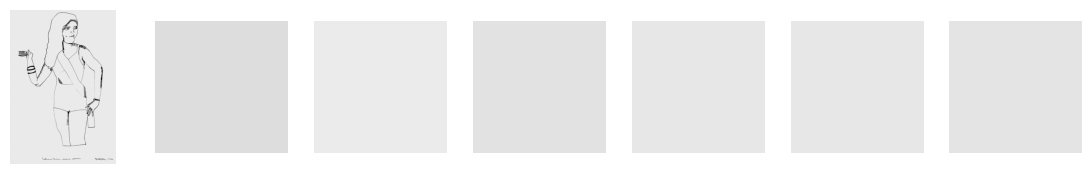

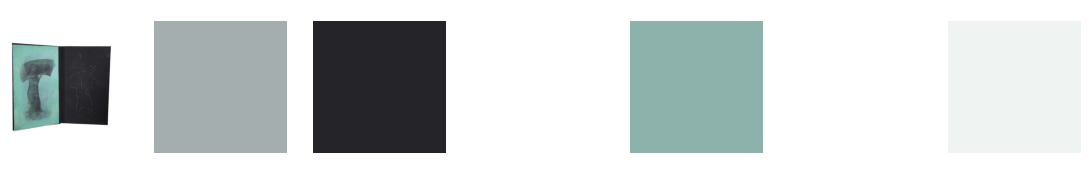

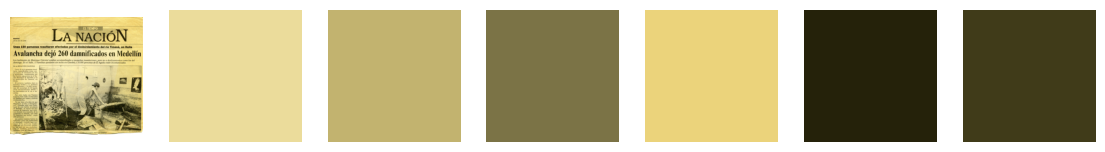

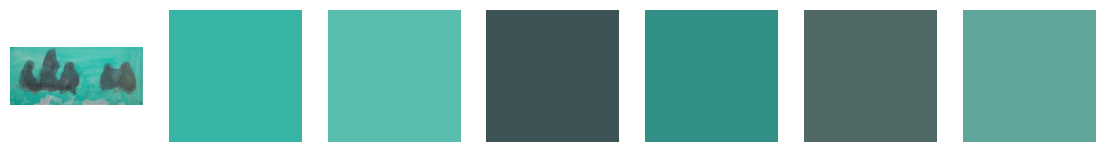

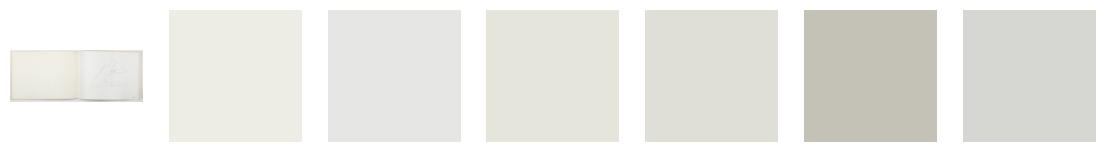

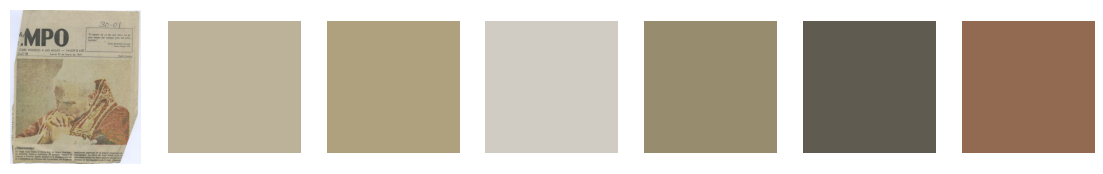

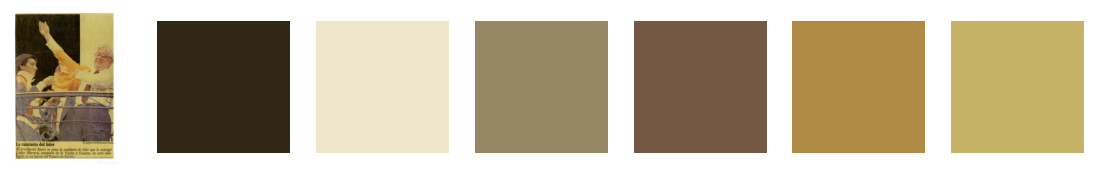

In [13]:
import ast
for i, image in enumerate(images[:10]):
    if image is not None:
        img_palette = ast.literal_eval(palette_img[i])
        show_palette(img_palette, img=image)